In [1]:
import pprint
import numpy as np
from memory_profiler import profile
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from real_time_deanonymization import get_frames


# Timing of algorithm by increasing packet number 

In [2]:
def run_test(number_of_packets):
    results = []
    for x in number_of_packets:
        result  = %timeit -r 3 -n 7 -c -o get_frames(x); 
        results.append(result)
    return results 
    

154 ms ± 4.75 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)
174 ms ± 1.86 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)
209 ms ± 2.76 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)
286 ms ± 4.9 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)
488 ms ± 7.45 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)
768 ms ± 4.67 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)
1.03 s ± 1.94 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)
1.26 s ± 4.18 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)
1.84 s ± 52.4 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)
2.47 s ± 82.6 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)
2.89 s ± 166 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)
3.89 s ± 51.9 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)
Worst case times are [0.15973871428571426, 0.17625171428571423, 0.21213899999999977, 0.2922299999999997, 0.49863200000000013, 0.7708189999999989, 1.0294490000000007, 1.259853

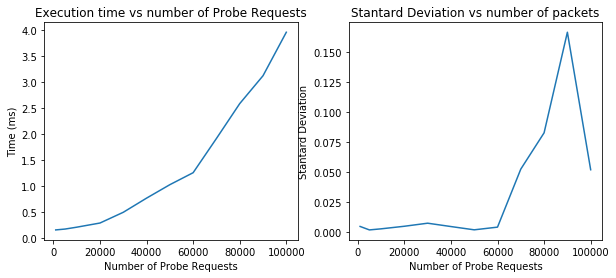

In [3]:


number_of_packets = [1000,5000,10000,20000,30000,40000,50000,60000
                    ,70000,80000,90000,100000];

#number_of_packets = [110000,120000,130000,140000];

results = run_test(number_of_packets)

worst_case_times = [x.worst for x in results]
stdev = [x.stdev for x in results]

print("Worst case times are {}".format(worst_case_times))

fig, axs = plt.subplots(ncols = 2,nrows = 1, figsize=(10,4),squeeze=False)
axs[0][0].plot(number_of_packets, worst_case_times)
axs[0][0].set_title('Execution time vs number of Probe Requests')
axs[0][0].set_xlabel("Number of Probe Requests")
axs[0][0].set_ylabel("Time (ms)");

axs[0][1].plot(number_of_packets, stdev)
axs[0][1].set_title('Stantard Deviation vs number of packets')
axs[0][1].set_xlabel("Number of Probe Requests")
axs[0][1].set_ylabel("Stantard Deviation");


In [26]:
%matplotlib qt
print(worst_case_times)
X = np.linspace(1000,100000,20)
y = [6.029e-10*(x**2) + -1.222e-05*x +0.2793 for x in X]


plt.plot(number_of_packets, worst_case_times,'rx',label="Timing Data")
plt.plot(X,y,'b',label="Fit curve")
plt.title('Execution time vs number of Probe Requests')
plt.xlabel("Number of Probe Requests")
plt.ylabel("Time (seconds)");
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
#plt.plot(number_of_packets, stdev)
#plt.set_title('Stantard Deviation vs number of packets')
#plt.set_xlabel("Number of Packets")
#plt.set_ylabel("Stantard Deviation");

[0.15735442857142853, 0.17530771428571437, 0.2194140000000002, 0.29061457142857144, 0.5484042857142859, 0.9639532857142855, 1.3933472857142846, 1.6625549999999996, 2.5135095714285733, 3.3764679999999965, 3.8242902857142838, 4.521226428571424]


In [ ]:
number_of_packets = [x for x in range(5000,5010)]
results = run_test(number_of_packets)
worst_case_times = [x.worst for x in results]
stdev = [x.stdev for x in results]

plt.figure()
plt.title("Stantard Deviation vs number of packets")
plt.plot(number_of_packets, worst_case_times, stdev, linestyle='None',capsize=10, fmt="o")
plt.xlabel("Number of Packets")



# Memory profiling by increasing number of packets

In [33]:
%load_ext memory_profiler
number_of_packets = [1000,5000,10000,20000,30000,40000,50000,60000
                    ,70000,80000,90000,100000];

results = []
for x in number_of_packets:
    result  =  %memit -o -r 7 get_frames(x); 
    results.append(result)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 225.86 MiB, increment: 0.02 MiB
peak memory: 225.75 MiB, increment: 0.40 MiB
peak memory: 225.75 MiB, increment: 0.00 MiB
peak memory: 235.50 MiB, increment: 9.75 MiB
peak memory: 246.70 MiB, increment: 19.94 MiB
peak memory: 257.75 MiB, increment: 30.25 MiB
peak memory: 268.75 MiB, increment: 40.16 MiB
peak memory: 280.00 MiB, increment: 50.53 MiB
peak memory: 295.24 MiB, increment: 65.74 MiB
peak memory: 310.23 MiB, increment: 75.48 MiB
peak memory: 309.28 MiB, increment: 70.30 MiB
peak memory: 304.63 MiB, increment: 97.11 MiB


<BarContainer object of 12 artists>

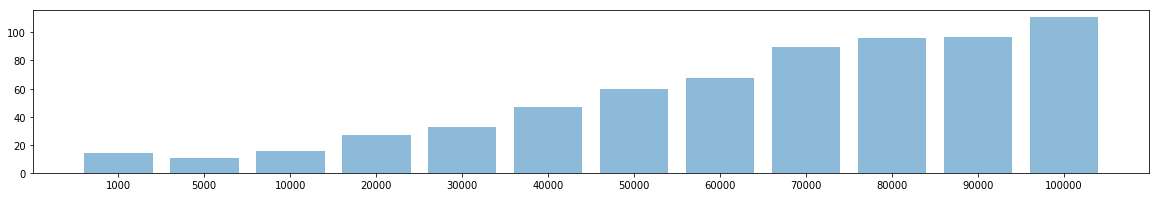

In [6]:
memory_usage = [(np.array(x.mem_usage).mean() - x.baseline) for x in results]
#plt.plot(number_of_packets, memory_usage)
plt.figure(figsize=(20, 3))  
plt.bar([str(x)for x in number_of_packets],memory_usage, alpha=0.5)

In [36]:
%matplotlib qt

X = np.linspace(1000,100000,20)
y = [0.0009259*x +221.3 for x in X]
memory_usage = [np.array(x.mem_usage).mean() for x in results]
plt.plot(number_of_packets, memory_usage,'rx',label="Memory Data")
plt.plot(X,y,'b',label="Fit line")
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
print(memory_usage)
print(results[1].baseline)

[225.85546875, 225.75390625, 225.75390625, 235.47767857142858, 246.64341517857142, 257.75390625, 268.75390625, 280.00167410714283, 295.09765625, 310.21205357142856, 294.70479910714283, 304.54185267857144]
225.35546875


# Time-based memory usage

In [134]:
%%bash
cd ~/Documents/3rd-Year-Project
number_of_packets=[1000 5000 10000 20000 30000 40000 50000 60000 70000 80000 90000 100000]
for x in "${number_of_packets[@]}"
do
    echo $x
    mprof run real_time_deanonymization.py -n $x
    match=$(ls | grep "mprofile_[0-9]*.dat")
    mv $match  ~/Documents/3rd-Year-Project/time_based_tests/$match
done
    



1
mprof: Sampling memory every 0.1s
running as a Python program...
5
mprof: Sampling memory every 0.1s
running as a Python program...
10
mprof: Sampling memory every 0.1s
running as a Python program...
50
mprof: Sampling memory every 0.1s
running as a Python program...
100
mprof: Sampling memory every 0.1s
running as a Python program...
250
mprof: Sampling memory every 0.1s
running as a Python program...
500
mprof: Sampling memory every 0.1s
running as a Python program...
1000
mprof: Sampling memory every 0.1s
running as a Python program...
5000
mprof: Sampling memory every 0.1s
running as a Python program...
10000
mprof: Sampling memory every 0.1s
running as a Python program...
20000
mprof: Sampling memory every 0.1s
running as a Python program...
30000
mprof: Sampling memory every 0.1s
running as a Python program...
40000
mprof: Sampling memory every 0.1s
running as a Python program...
50000
mprof: Sampling memory every 0.1s
running as a Python program...
60000
mprof: Sampling memory

mv: target 'mprofile_20190226122424.dat' is not a directory
mv: target 'mprofile_20190226122426.dat' is not a directory
mv: target 'mprofile_20190226122428.dat' is not a directory
mv: target 'mprofile_20190226122430.dat' is not a directory
mv: target 'mprofile_20190226122432.dat' is not a directory
mv: target 'mprofile_20190226122434.dat' is not a directory
mv: target 'mprofile_20190226122436.dat' is not a directory
mv: target 'mprofile_20190226122438.dat' is not a directory
mv: target 'mprofile_20190226122440.dat' is not a directory
mv: target 'mprofile_20190226122442.dat' is not a directory
mv: target 'mprofile_20190226122444.dat' is not a directory
mv: target 'mprofile_20190226122446.dat' is not a directory
mv: target 'mprofile_20190226122448.dat' is not a directory
mv: target 'mprofile_20190226122450.dat' is not a directory
mv: target 'mprofile_20190226122453.dat' is not a directory
mv: target 'mprofile_20190226122456.dat' is not a directory
mv: target 'mprofile_20190226122459.dat'

In [14]:
%%bash
cd ~/Documents/3rd-Year-Project
mprof run real_time_deanonymization.py -n 100000
match=$(ls | grep "mprofile_[0-9]*.dat")
mv $match  ~/Documents/3rd-Year-Project/time_based_tests/$match

mprof: Sampling memory every 0.1s
running as a Python program...


In [15]:
%%bash
cd ~/Documents/3rd-Year-Project/time_based_tests/
mprof plot -o result.png --backend agg

Using last profile data.


![alt text](../time_based_tests/result.png "Logo Title Text 1")

# Global Probe requests



In [1]:
%qtconsole 

In [2]:
import pprint
import numpy as np
from memory_profiler import profile
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from real_time_deanonymization_3 import get_frames as get_frames_3
import global_mac_randomiser

In [3]:
def run_test_2(number_of_packets,database,comparison_db):
    results = []
    for x in number_of_packets:
        result  = %timeit -r 3 -n 7 -c -o get_frames_3(x,database = database); 
        results.append(result)
    return results 

10.4 ms ± 1.43 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)
37.7 ms ± 1.25 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)
92.3 ms ± 4.82 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)
161 ms ± 9.75 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)
238 ms ± 1.5 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)
356 ms ± 1.07 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)
511 ms ± 864 µs per loop (mean ± std. dev. of 3 runs, 7 loops each)
668 ms ± 38.4 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)
875 ms ± 56.2 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)
1.03 s ± 21.1 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)
1.15 s ± 31.2 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)
1.3 s ± 21 ms per loop (mean ± std. dev. of 3 runs, 7 loops each)


Text(0.5, 0, 'Number of Packets')

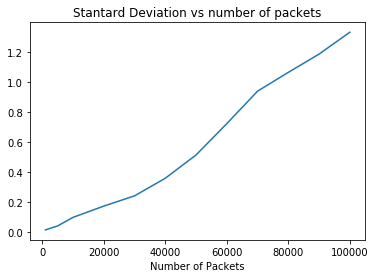

In [4]:
number_of_packets = [1000,5000,10000,20000,30000,40000,50000,60000
                    ,70000,80000,90000,100000];

results = run_test_2(number_of_packets,'mac_research','mac_research')
worst_case_times = [x.worst for x in results]
stdev = [x.stdev for x in results]

plt.figure()
plt.title("Stantard Deviation vs number of packets")
plt.plot(number_of_packets, worst_case_times)
plt.xlabel("Number of Packets")


In [15]:
%matplotlib qt

X = np.linspace(1000,100000,20)
y = [(9.328e-11)*x**2 +5.032e-06*x + 0.0148 for x in X]
y_2 = [6.029e-10*(x**2) + -1.222e-05*x +0.2793 for x in X]
plt.plot(number_of_packets, worst_case_times,'rx',label="Timing Data")
plt.plot(X,y,'b',label="Global Algorithm")
plt.plot(X,y_2,'c',label="Original Algorithm")
plt.title('Execution time vs number of Probe Requests')
plt.xlabel("Number of Probe Requests")
plt.ylabel("Time (seconds)");
plt.rcParams.update({'font.size': 12})
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)